### Exploratory Data Analysis (EDA) and Sentiment Analysis of Reddit comments

This code runs a simple EDA and sentiment analysis of the web scraped data.
We look at simple statistics as well as overall sentiment in the comments of this [post](http://www.reddit.com/r/apple/comments/1de4qkn/what_are_your_biggest_takeaways_from_wwdc_2024_so/).

In [1]:
# Import libraries related to data manipulation, charting, and sentiment analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Download necessary NLTK data
nltk.download('vader_lexicon')

# Load the Excel file
file_path = 'reddit_comments.xlsx'
df = pd.read_excel(file_path)

# Display first 5 rows of the data
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,post_id,post_title,post_score,post_url,post_num_comments,post_author,comment_id,comment_author,comment_body,comment_time
0,1de4qkn,What are your biggest takeaways from WWDC 2024...,320,https://www.business-standard.com/technology/t...,356,karma_1264,l89dpg7,Koulie,That Apple was able to deliver core features t...,2024-06-12 20:29:29
1,1de4qkn,What are your biggest takeaways from WWDC 2024...,320,https://www.business-standard.com/technology/t...,356,karma_1264,l89ajyh,Reesepect,"For me, math notes was pretty impressive; make...",2024-06-12 20:05:21
2,1de4qkn,What are your biggest takeaways from WWDC 2024...,320,https://www.business-standard.com/technology/t...,356,karma_1264,l89bm9n,jretman,"While it may seem like a minor update, I'm so ...",2024-06-12 20:13:42
3,1de4qkn,What are your biggest takeaways from WWDC 2024...,320,https://www.business-standard.com/technology/t...,356,karma_1264,l89h0ld,HugeSession,The iphone mirroring seems awesome to me; fina...,2024-06-12 20:53:17
4,1de4qkn,What are your biggest takeaways from WWDC 2024...,320,https://www.business-standard.com/technology/t...,356,karma_1264,l89fqbq,DancinWithWolves,I’m curious; with all the on device and cloud ...,2024-06-12 20:44:15


In [3]:
# Convert the comment_time column to datetime format
df['comment_time'] = pd.to_datetime(df['comment_time'])

In [4]:
# Display the columns to understand the structure of the data
df.columns

Index(['post_id', 'post_title', 'post_score', 'post_url', 'post_num_comments',
       'post_author', 'comment_id', 'comment_author', 'comment_body',
       'comment_time'],
      dtype='object')

#### EDA part
This shows the following:
- Basic Information about the data
- Summary Statistics
- Simple charts on some important fields
- Wordcloud on the frequently used terms in the comments

In [5]:
# Display basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   post_id            316 non-null    object        
 1   post_title         316 non-null    object        
 2   post_score         316 non-null    int64         
 3   post_url           316 non-null    object        
 4   post_num_comments  316 non-null    int64         
 5   post_author        316 non-null    object        
 6   comment_id         316 non-null    object        
 7   comment_author     309 non-null    object        
 8   comment_body       316 non-null    object        
 9   comment_time       316 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 24.8+ KB


In [6]:
# Summary statistics of the dataframe
df.describe()

,post_score,post_num_comments,comment_time
count,316.0,316.0,316
mean,320.0,356.0,2024-06-13 19:59:06.674050816
min,320.0,356.0,2024-06-12 20:00:40
25%,320.0,356.0,2024-06-12 21:47:21.750000128
50%,320.0,356.0,2024-06-12 23:49:01
75%,320.0,356.0,2024-06-13 04:41:23.249999872
max,320.0,356.0,2024-07-06 02:21:16
std,0.0,0.0,NaN


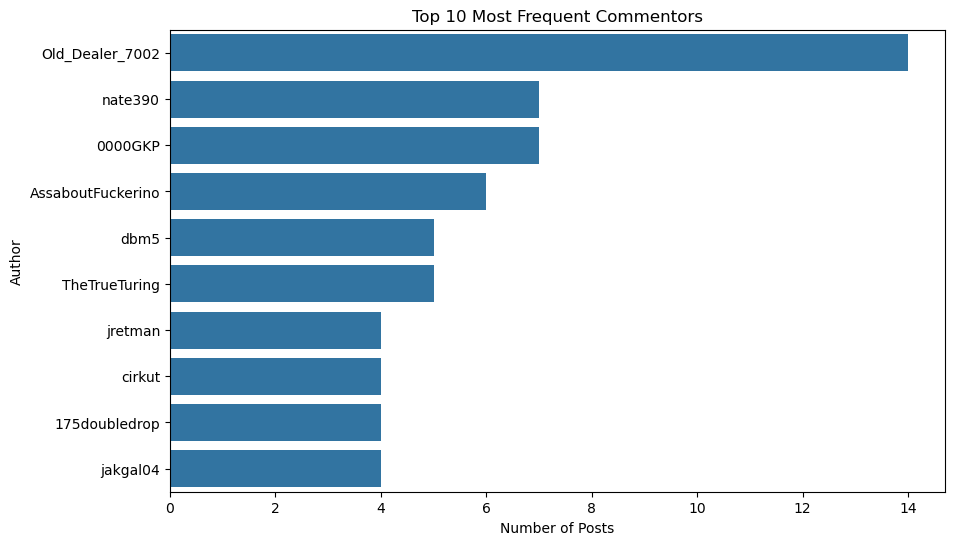

In [7]:
# Top 10 most frequent comment authors
top_authors = df['comment_author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Most Frequent Commentors')
plt.xlabel('Number of Posts')
plt.ylabel('Author')
plt.show()

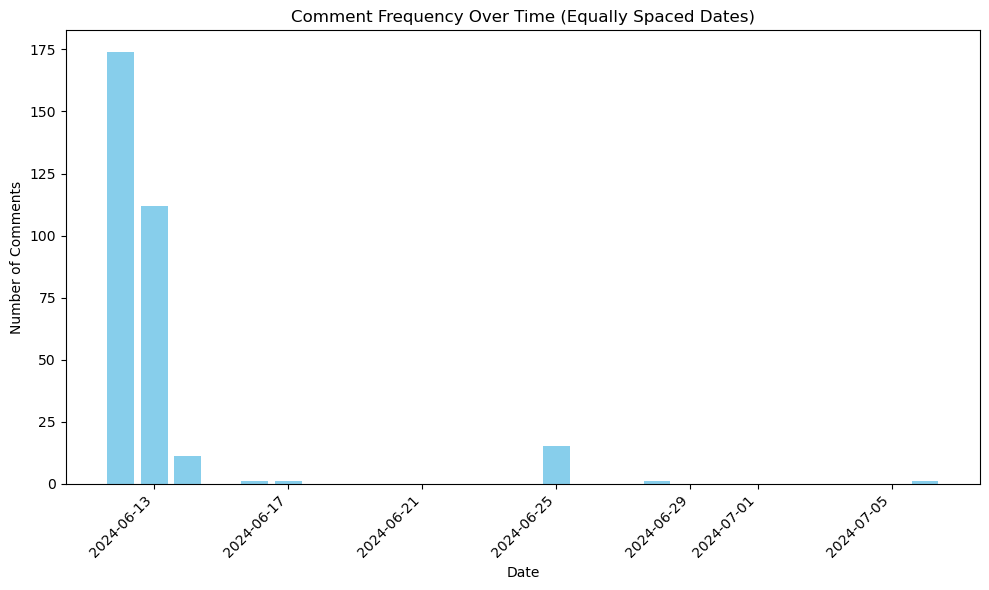

In [8]:
# Number of Comments during the post dates
daily_comments = df.groupby(df['comment_time'].dt.date)['comment_body'].count()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(daily_comments.index, daily_comments.values, width=0.8, color='skyblue')

# Customize labels and title
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Comment Frequency Over Time (Equally Spaced Dates)')

# Rotate X-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

WordCloud

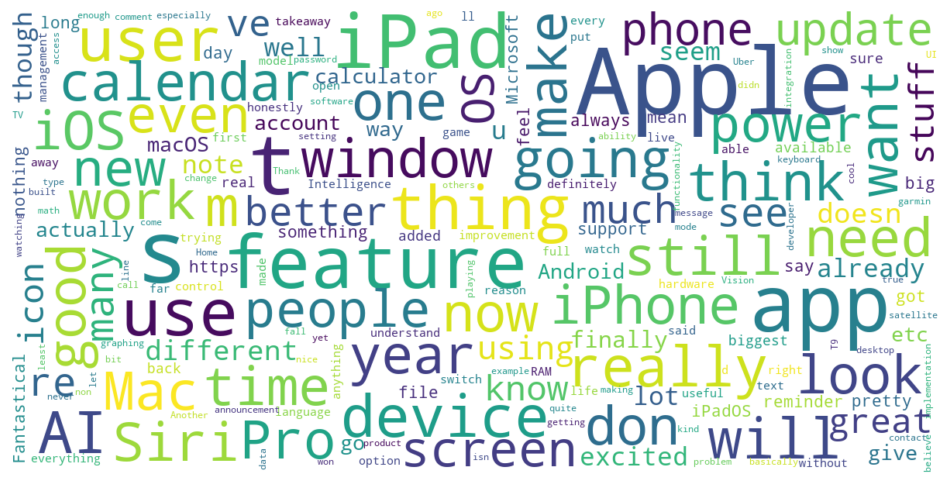

In [25]:
# Assuming your dataframe is named 'df'
comments = df['comment_body'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white',
    collocations=False,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1
).generate(comments)

# Display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Removing Apple related terms to get the sentiment

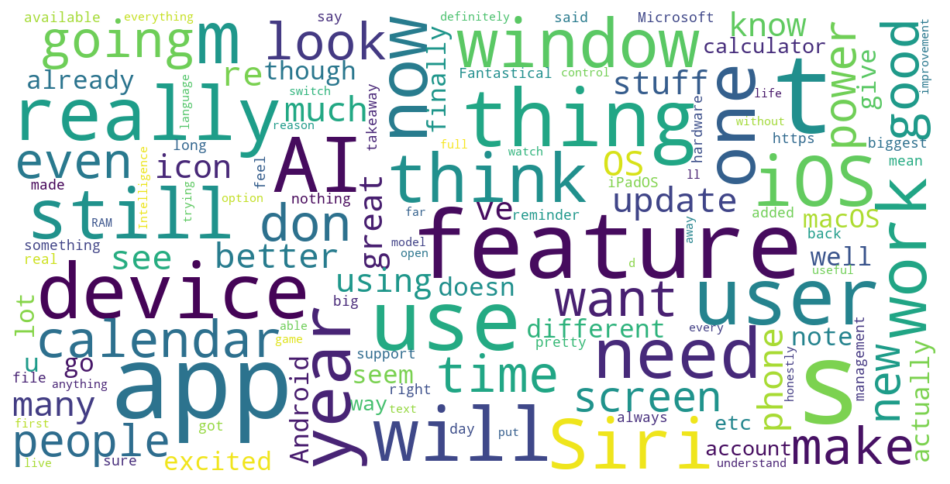

In [23]:
# Assuming your dataframe is named 'df'
comments = df['comment_body'].str.cat(sep=' ')

# Create a set of custom stopwords (if needed)
custom_stopwords = set(['Apple', 'iPad', 'Mac', 'Pro', 'iPhone'])

# Combine NLTK stopwords with custom stopwords
all_stopwords = set(STOPWORDS) | custom_stopwords

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white',
    stopwords=all_stopwords,
    max_words=200,
    max_font_size=50,
    scale=3,
    random_state=1,
    collocations=False
).generate(comments)

# Display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Sentiment Analysis Part
- Calculation of scores (polarity and subjectivity)
- Summary of scores
- Visualization of overall distribution

In [11]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores using VADER
def compute_vader_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Function to compute sentiment scores using TextBlob
def compute_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the sentiment analysis to the comments
df['vader_sentiment'] = df['comment_body'].apply(compute_vader_sentiment)
df['textblob_polarity'], df['textblob_subjectivity'] = zip(*df['comment_body'].apply(compute_textblob_sentiment))

# Combine the sentiment scores from both VADER and TextBlob
df['combined_sentiment'] = df[['vader_sentiment', 'textblob_polarity']].mean(axis=1)

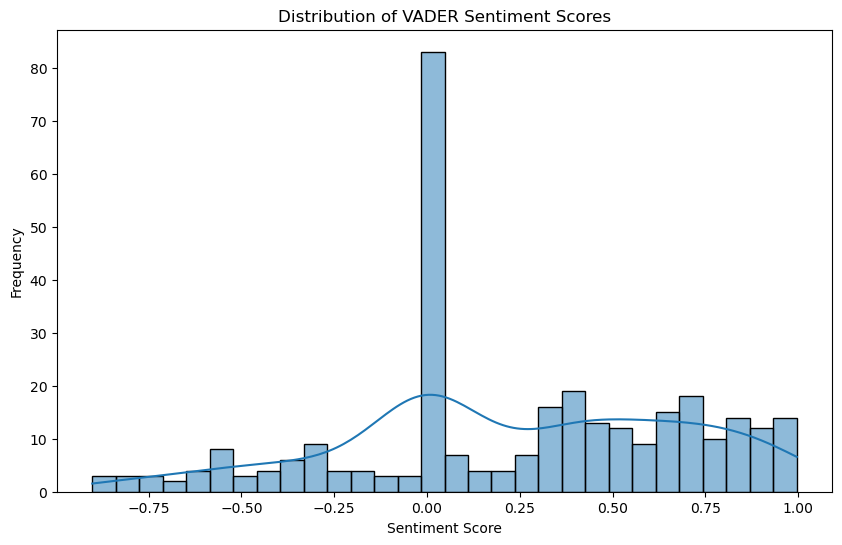

In [12]:
# Plot the distribution of VADER sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['vader_sentiment'], kde=True, bins=30)
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

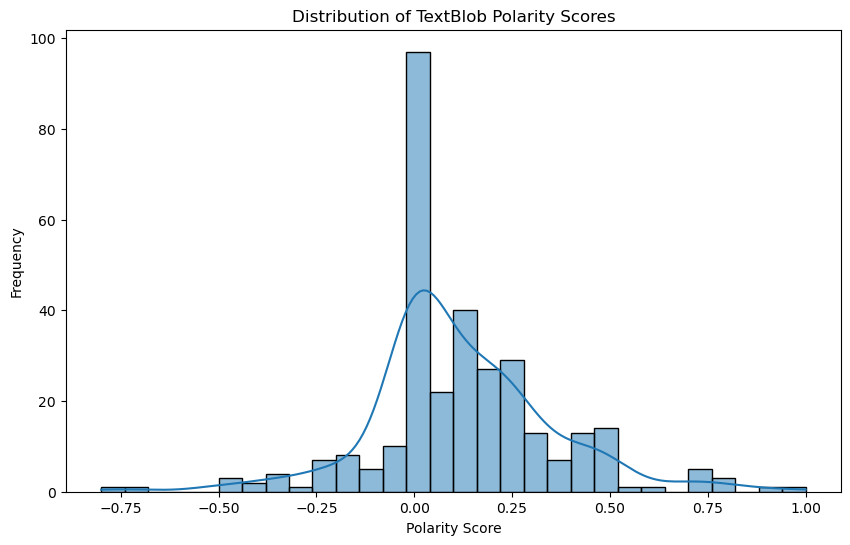

In [13]:
# Plot the distribution of TextBlob polarity scores
plt.figure(figsize=(10, 6))
sns.histplot(df['textblob_polarity'], kde=True, bins=30)
plt.title('Distribution of TextBlob Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

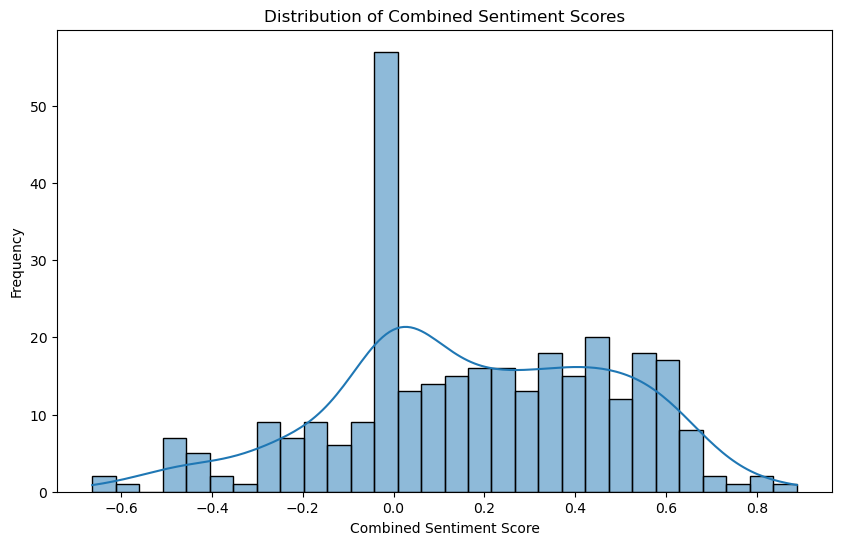

In [14]:
# Plot the distribution of combined sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['combined_sentiment'], kde=True, bins=30)
plt.title('Distribution of Combined Sentiment Scores')
plt.xlabel('Combined Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Summary statistics of sentiment scores
df[['vader_sentiment', 'textblob_polarity', 'textblob_subjectivity', 'combined_sentiment']].describe()

,vader_sentiment,textblob_polarity,textblob_subjectivity,combined_sentiment
count,316.000000,316.000000,316.000000,316.000000
mean,0.237340,0.118741,0.424873,0.178040
std,0.455683,0.234244,0.281673,0.304028
min,-0.902200,-0.800000,0.000000,-0.663350
25%,0.000000,0.000000,0.200000,0.000000
50%,0.265800,0.087500,0.479887,0.170100
75%,0.639825,0.250000,0.607672,0.427026
max,0.996500,1.000000,1.000000,0.887650


In [16]:
# Display the first few rows with sentiment scores
df[['comment_body', 'vader_sentiment', 'textblob_polarity', 'textblob_subjectivity', 'combined_sentiment']].head()


,comment_body,vader_sentiment,textblob_polarity,textblob_subjectivity,combined_sentiment
0,That Apple was able to deliver core features t...,0.7003,0.100000,0.565278,0.400150
1,"For me, math notes was pretty impressive; make...",0.8481,0.400000,0.637500,0.624050
2,"While it may seem like a minor update, I'm so ...",0.9124,0.221591,0.663636,0.566995
3,The iphone mirroring seems awesome to me; fina...,0.8316,0.483333,0.754167,0.657467
4,I’m curious; with all the on device and cloud ...,0.5859,0.000000,0.700000,0.292950


Sentiment Over Time Analysis

In [17]:
# Group by day and compute the average combined sentiment score
df['date'] = df['comment_time'].dt.date
sentiment_over_time = df.groupby('date')['combined_sentiment'].mean()

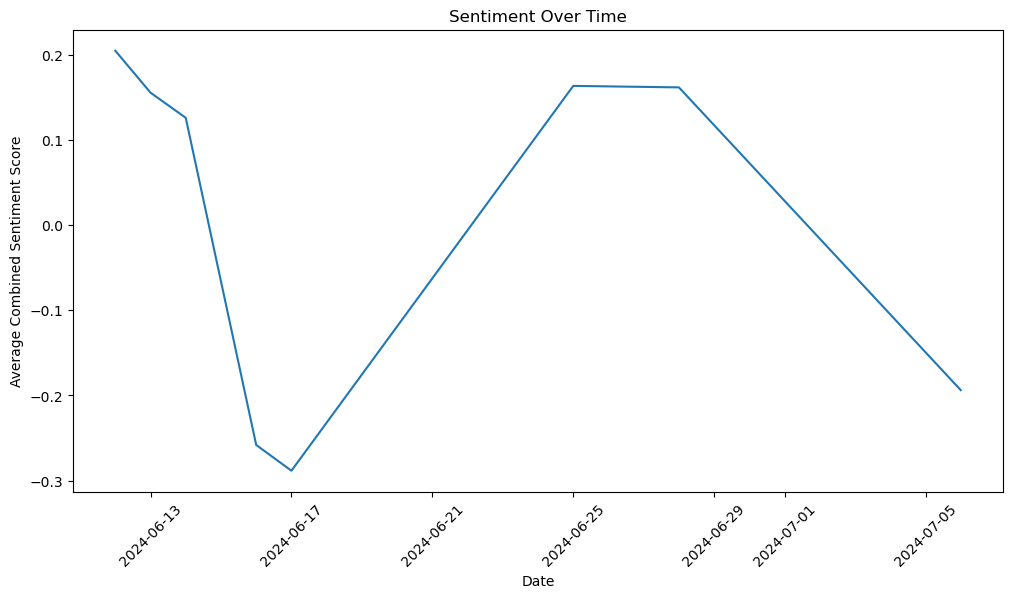

In [18]:
# Plot the sentiment over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot()
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Combined Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Export the DataFrame with sentiment scores to a excel file
output_file_path = 'reddit_comments_with_sentiment.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Sentiment analysis results saved to {output_file_path}")

Sentiment analysis results saved to reddit_comments_with_sentiment.xlsx
